In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-protein-atlas-image-classification/sample_submission.csv
/kaggle/input/human-protein-atlas-image-classification/train.csv


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-05-19 15:11:08.817796: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 15:11:08.817937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 15:11:08.967803: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5245353526006791312
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16274030592
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3161762880725422045
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv('/kaggle/input/human-protein-atlas-image-classification/train.csv')


In [4]:
class_labels = [
    'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center', 'Nuclear speckles',
    'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Peroxisomes', 'Endosomes',
    'Lysosomes', 'Intermediate filaments', 'Actin filaments', 'Focal adhesion sites', 'Microtubules',
    'Microtubule ends', 'Cytokinetic bridge', 'Mitotic spindle', 'Microtubule organizing center',
    'Centrosome', 'Lipid droplets', 'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome',
    'Cytosol', 'Cytoplasmic bodies', 'Rods & rings'
]

for label in class_labels:
    df[label] = 0

# Function to preprocess target labels
def preprocess_targets(row, class_labels):
    targets = row['Target'].split()
    for target in targets:
        class_label = class_labels[int(target)]
        row[class_label] = 1
    return row

# Apply the preprocessing function to create one-hot encoded columns
df = df.apply(lambda row: preprocess_targets(row, class_labels), axis=1)

# Store the preprocessed data


In [5]:
df

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31067,ffed4430-bbac-11e8-b2ba-ac1f6b6435d0,21,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31068,fff0a998-bbae-11e8-b2ba-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31069,fff189d8-bbab-11e8-b2ba-ac1f6b6435d0,7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31070,fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0,25 2 21,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [6]:
multi_label = df.copy(deep=True)


In [7]:
multi_label.columns

Index(['Id', 'Target', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli',
       'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies',
       'Endoplasmic reticulum', 'Golgi apparatus', 'Peroxisomes', 'Endosomes',
       'Lysosomes', 'Intermediate filaments', 'Actin filaments',
       'Focal adhesion sites', 'Microtubules', 'Microtubule ends',
       'Cytokinetic bridge', 'Mitotic spindle',
       'Microtubule organizing center', 'Centrosome', 'Lipid droplets',
       'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome',
       'Cytosol', 'Cytoplasmic bodies', 'Rods & rings'],
      dtype='object')

In [8]:
multi_label.drop(columns=['Id','Target'],inplace=True)

In [9]:
multi_label.columns

Index(['Nucleoplasm', 'Nuclear membrane', 'Nucleoli',
       'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies',
       'Endoplasmic reticulum', 'Golgi apparatus', 'Peroxisomes', 'Endosomes',
       'Lysosomes', 'Intermediate filaments', 'Actin filaments',
       'Focal adhesion sites', 'Microtubules', 'Microtubule ends',
       'Cytokinetic bridge', 'Mitotic spindle',
       'Microtubule organizing center', 'Centrosome', 'Lipid droplets',
       'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome',
       'Cytosol', 'Cytoplasmic bodies', 'Rods & rings'],
      dtype='object')

In [10]:
label_tensors = tf.convert_to_tensor(multi_label.to_numpy(), dtype=tf.int64)

In [11]:
label_tensors

<tf.Tensor: shape=(31072, 28), dtype=int64, numpy=
array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>

In [12]:
#output_dataset = tf.data.Dataset.from_tensor_slices(label_tensors)

In [13]:
#output_dataset

In [1]:
# import cv2

# # Load the image
# image = cv2.imread('/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png')

# # Get the number of color channels
# num_channels = image.shape[2]

# print(f"The number of color channels in the image is {num_channels}")

The number of color channels in the image is 3


In [32]:
#image[:,:,0]

/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png
/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png
/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red.png
/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yellow.png


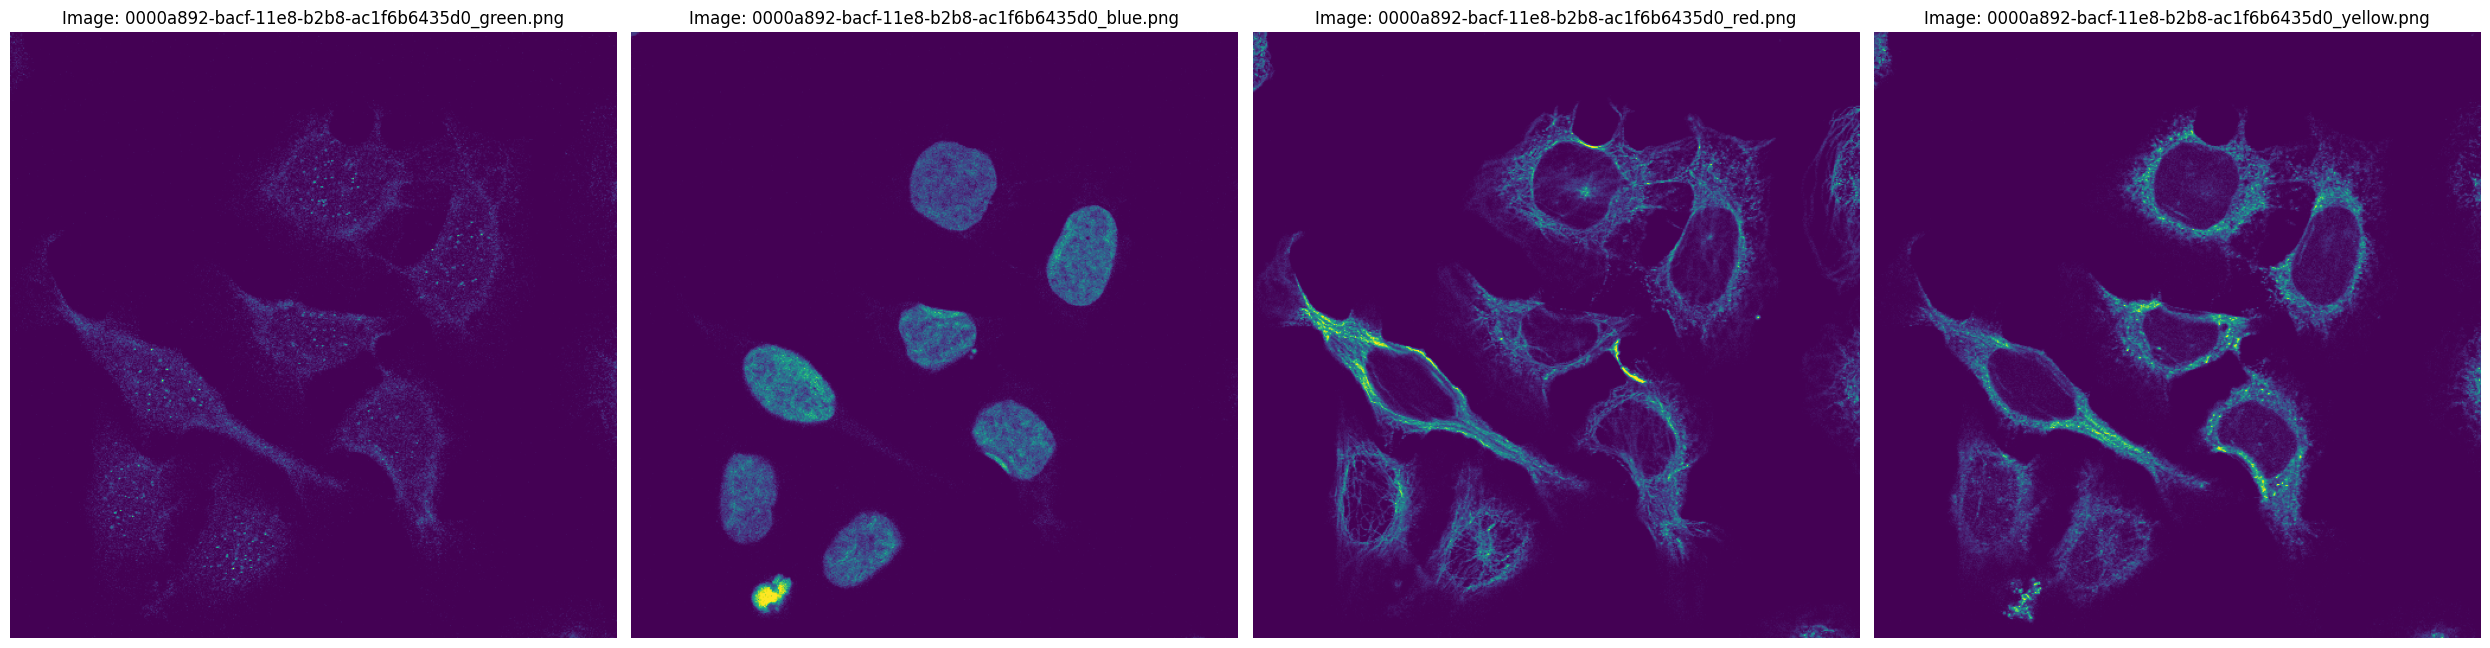

In [31]:
image_paths = [
    '/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png',
    '/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png',
    '/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red.png',
    '/kaggle/input/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yellow.png'
    # Add more image paths as needed
]

# Create a figure with subplots in one row
fig, axes = plt.subplots(1, len(image_paths), figsize=(25, 15))

# Loop through the list of image paths
for ax, image_path in zip(axes, image_paths):
    print(image_path)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Display the image
    ax.imshow(image)
    ax.set_title(f'Image: {image_path.split("/")[-1]}')
    ax.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [33]:
# import matplotlib.pyplot as plt
# # Load an image
# image_path = '/kaggle/input/human-protein-atlas-image-classification/train/5e3a2e6a-bb9c-11e8-b2b9-ac1f6b6435d0_blue.png'
# print(image_path)
# image = tf.io.read_file(image_path)
# image = tf.image.decode_image(image)

# # Display the image
# plt.imshow(image)
# plt.title('Sample Image with TensorFlow')
# plt.axis('off')
# plt.show()

## Grouping this image based on Unique ID and color

In [14]:
import os 
data_dir = '/kaggle/input/human-protein-atlas-image-classification/train'  # Path to the directory containing images

# List all image file paths
image_paths = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
print(len(image_paths))
# Group image paths by their unique identifiers
image_groups = {}
for path in image_paths:
    uid = os.path.basename(path).split('_')[0]
    suffix = os.path.basename(path).split('_')[-1].split('.')[0]
    if uid not in image_groups:
        image_groups[uid] = {}
    image_groups[uid][suffix] = path


124288


In [34]:
# No Use
# image_groups_with_targets = []
# for uid, paths in image_groups.items():
#     if all(paths.get(suffix) for suffix in ['blue', 'green', 'red', 'yellow']):
#         targets = df.loc[df['Id'] == uid, 'Target'].values[0]
#         image_groups_with_targets.append((paths['blue'], paths['green'], paths['red'], paths['yellow'], targets))

In [15]:
# Convert to list of tuples (blue_path, green_path, red_path, yellow_path)
image_groups = [(v.get('blue', ''), v.get('green', ''), v.get('red', ''), v.get('yellow', '')) for v in image_groups.values()]

# Remove groups with missing images
image_groups = [(b, g, r, y) for (b, g, r, y) in image_groups if b and g and r and y]

In [16]:
import pickle
# Save the evaluated image_groups list to a file
with open('/kaggle/working/image_groups.pkl', 'wb') as f:
    pickle.dump(image_groups, f)

In [42]:
# import pickle
# image_groups_with_targets = []
# with open('/kaggle/input/file-names-preprocessed/image_groups_with_targets.pkl', 'rb') as f:
#      image_groups_with_targets = pickle.load(f)

In [17]:
len(image_groups)

31072

# Preprocessing & Pipelining

In [44]:
# tf.random.set_seed(42)
# tf.random.shuffle(image_groups_with_targets)

In [45]:
# image1 = [('/kaggle/input/human-protein-atlas-image-classification/train/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png', '/kaggle/input/human-protein-atlas-image-classification/train/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png', '/kaggle/input/human-protein-atlas-image-classification/train/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red.png', '/kaggle/input/human-protein-atlas-image-classification/train/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yellow.png'), ('/kaggle/input/human-protein-atlas-image-classification/train/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png', '/kaggle/input/human-protein-atlas-image-classification/train/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png', '/kaggle/input/human-protein-atlas-image-classification/train/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red.png', '/kaggle/input/human-protein-atlas-image-classification/train/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yellow.png')]

In [18]:
import os
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'
import tensorflow as tf

In [19]:
@tf.function
def preprocess_images(image_paths,output):
    def preprocess_image(image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_png(image, channels=3)  # Assuming PNG images with 3 color channels
        image = tf.image.resize(image, [224, 224])  # Resize to desired dimensions
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return image
    return (preprocess_image(image_paths[0]), preprocess_image(image_paths[1]), preprocess_image(image_paths[2]), preprocess_image(image_paths[3])) , output
    

# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((image_groups,label_tensors))

# Map the preprocess function to the dataset


In [20]:
    # Apply preprocess_images function to the dataset
dataset = dataset.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)

In [21]:
dataset

<_ParallelMapDataset element_spec=((TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(28,), dtype=tf.int64, name=None))>

In [48]:
# dataset = dataset.batch(10)
# dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# # Print the first batch of images
# for batch in dataset.take(1):
#     print(batch[0].shape)  # Shape of the batch for blue images
#     print(batch[1].shape)  # Shape of the batch for green images
#     print(batch[2].shape)  # Shape of the batch for red images
#     print(batch[3].shape)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10, 224, 224, 3)
(10, 224, 224, 3)


# Tranining

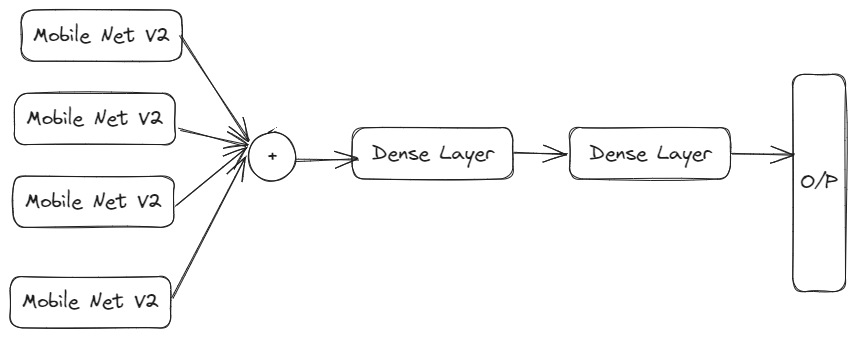

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large

# Load MobileNetV3Large without the top classification layer
base_model = MobileNetV3Large(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Print the summary of the model to see the layer details
base_model.summary()

2024-05-19 12:41:12.443335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 12:41:12.443445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 12:41:12.567185: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobilenetV3large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 2,971,952 (11.34 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [22]:
batch_size=64

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras as ke

# Define a function to create a MobileNetV3-Large without the classification layer
def create_mobilenet_v3_large(input_shape):
    base_model = MobileNetV3Large(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = ke.layers.Dense(units = 512)(x)
    return Model(inputs=base_model.input, outputs=x)

# Define input shape
input_shape = (224, 224, 3)

# Create four parallel MobileNetV3-Large models
blue_input = Input(shape=input_shape, name='blue_input')
green_input = Input(shape=input_shape, name='green_input')
red_input = Input(shape=input_shape, name='red_input')
yellow_input = Input(shape=input_shape, name='yellow_input')

blue_model = create_mobilenet_v3_large(input_shape)
green_model = create_mobilenet_v3_large(input_shape)
red_model = create_mobilenet_v3_large(input_shape)
yellow_model = create_mobilenet_v3_large(input_shape)

# Get the outputs of the four models
blue_output = blue_model(blue_input)
green_output = green_model(green_input)
red_output = red_model(red_input)
yellow_output = yellow_model(yellow_input)

# Concatenate the outputs of the four models
concat_output = Multiply()([blue_output, green_output, red_output, yellow_output])

# Add two fully connected layers
fc1 = Dense(512, activation='relu')(concat_output)
fc2 = Dense(256, activation='relu')(concat_output)

# Add the final classification layer (assuming num_classes is the number of target classes)
num_classes = len(class_labels)
output = Dense(num_classes, activation='sigmoid')(fc2)  # Use sigmoid for multi-label classification

# Define the final model
model = Model(inputs=[blue_input, green_input, red_input, yellow_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ blue_input          │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ green_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ red_input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ yellow_input        │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_21       │ (None, 512)       │  3,488,384 │ blue_input[0][0]  │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_23       │ (None, 512)       │  3,488,384 │ green_input[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_25       │ (None, 512)       │  3,488,384 │ red_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_27       │ (None, 512)       │  3,488,384 │ yellow_input[0][… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_98         │ (None, 512)       │          0 │ functional_21[0]… │
│ (Multiply)          │                   │            │ functional_23[0]… │
│                     │                   │            │ functional_25[0]… │
│                     │                   │            │ functional_27[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │    131,328 │ multiply_98[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 28)        │      7,196 │ dense_19[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,092,060 (53.76 MB)

 Trainable params: 2,106,652 (8.04 MB)

 Non-trainable params: 11,985,408 (45.72 MB)

In [24]:
dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [25]:
dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 28), dtype=tf.int64, name=None))>

In [24]:
#output_dataset = output_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path for saving checkpoints
checkpoint_path = '/kaggle/working/model_checkpoint.weights.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Save the model based on validation loss
                                      save_weights_only=True,  # Save only the weights
                                      save_best_only=False,  # Save only the best model
                                      verbose=1)

In [57]:
#dataset

In [43]:
#output_dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 28), dtype=tf.int64, name=None)>

In [37]:
#combined_dataset = tf.data.Dataset.zip((dataset, output_dataset))

In [38]:
# def extract_input_output(input_data, output_data):
#     return input_data, output_data

# # Assuming combined_dataset is your combined dataset containing input-output pairs
# # Apply the extract_input_output function to each element of the dataset
# processed_dataset = combined_dataset.map(extract_input_output)

In [58]:
#processed_dataset = processed_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [27]:
dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 28), dtype=tf.int64, name=None))>

In [ ]:
history = model.fit(dataset, epochs=10,callbacks=[checkpoint_callback])

# Extract loss values from the history object
loss = history.history['loss']

# Plot the loss values
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Epoch 1/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.3692 - loss: 0.2049
Epoch 1: saving model to /kaggle/working/model_checkpoint.weights.h5
486/486 ━━━━━━━━━━━━━━━━━━━━ 257s 456ms/step - accuracy: 0.3693 - loss: 0.2048
Epoch 2/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.4147 - loss: 0.1755
Epoch 2: saving model to /kaggle/working/model_checkpoint.weights.h5
486/486 ━━━━━━━━━━━━━━━━━━━━ 201s 413ms/step - accuracy: 0.4147 - loss: 0.1755
Epoch 3/10
378/486 ━━━━━━━━━━━━━━━━━━━━ 44s 411ms/step - accuracy: 0.4147 - loss: 0.1754